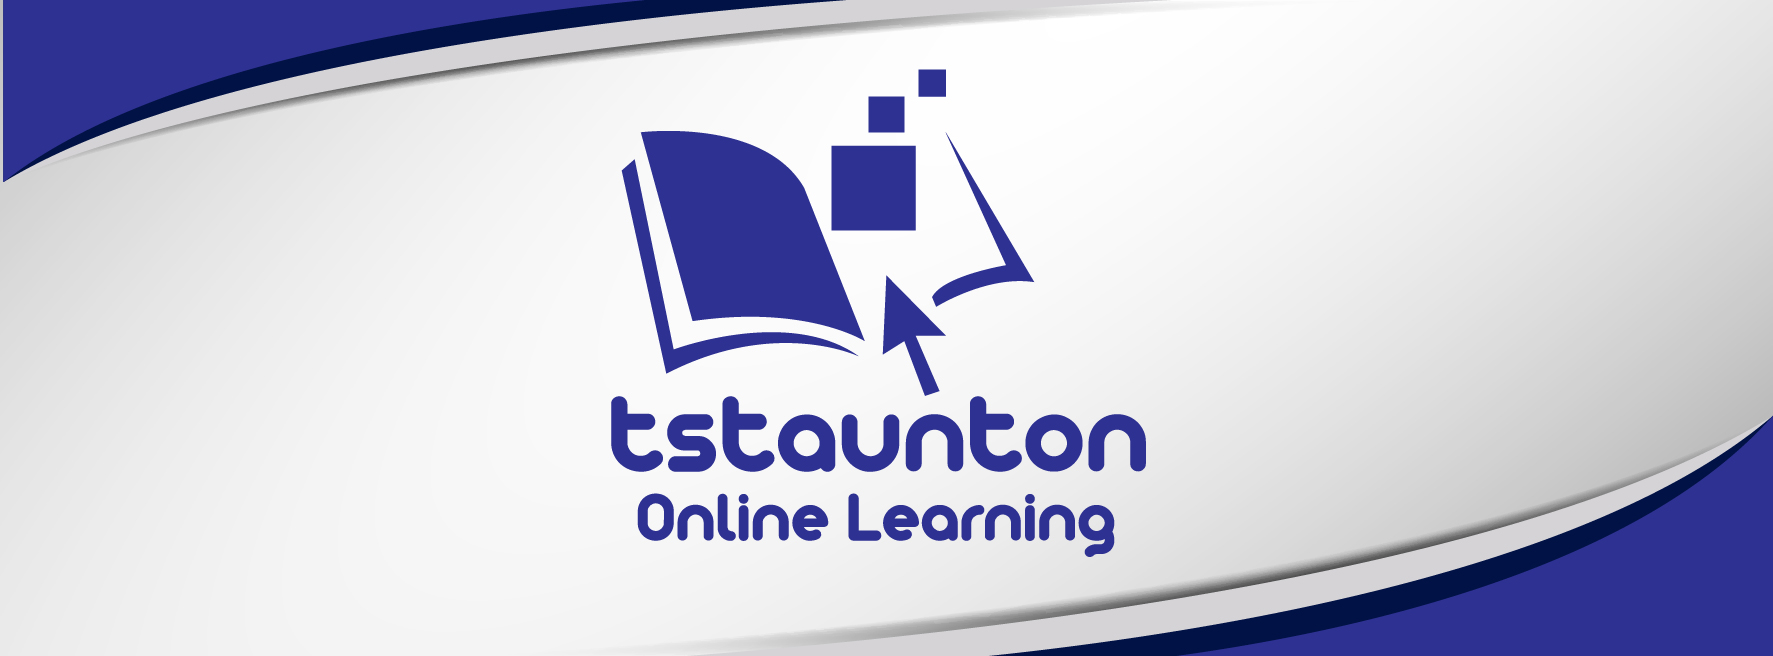
***
# Loops
***

In the previous lesson we explored ways to alter the flow of our Python programs. In this lesson we'll explore **loops** starting with the **while loop**.

The while loop is similar to an if statement. In that it executes the code inside it if the condition is True. The big difference between a while loop and if statement is that the while loop will continue to repeat the statement over and over again as long as the condition is true.

Let's take a look at an example by counting to 10.

In [ ]:
total = 0

while total <= 9:
    total = total +1
    print(total)

In [ ]:
# Initialize offset
blast_off = 8

# Code the while loop
while blast_off != 0:
    print("T-minus...")
    blast_off = blast_off - 1
    print(blast_off)

In [ ]:
# Initialize offset
blast_off = 11

# Code the while loop
while blast_off != 1 :
    print("T-minus...")
    blast_off = blast_off - 1
    print(blast_off)
    if blast_off <= 1:
        print("...LIFT OFF...")

## The for Loop

Now let's take a look at another of Python's loops, the **for loop**.

In [ ]:
# Create a list
salary_list = [21000, 23000, 29000, 34000, 38000, 59000, 60000]

# Print each element in a list seperatley
for salary in salary_list:
    print(salary)

Take another look at the output from the code example above. Do you notice anything missing? These is no access to an index in the iteration. We use enumerate to help with this task which will give us two values on each iteration of the for loop.

In [ ]:
# Use enumerate to create an index in a for loop
for index, salary in enumerate(salary_list):
    print("index " + str(index) + ": " + str(salary))

In the example above the index starts at 0 which looks a bit strange. Let's try and start it at 1.

In [ ]:
for index, salary in enumerate(salary_list):
    print("index " + str(index+1) + ": " + str(salary))

We can even iterate over characters in a string with a for loop.

In [ ]:
for c in "string":
    print(c.capitalize())

In [ ]:
# Employee and salaries list
employees = [["tony", 20000],
             ["Jane", 30000],
             ["Amy", 40000]]

for staff in employees:
    print(staff[0] + " earns " + str(staff[1]) + " per year.")

In [ ]:
for staff in employees:
    print(staff[0].capitalize() + " earns " + str(staff[1]) + " per year.")

## Looping over data structures

We've just seen how to loop over lists and strings but as we have seen there are many other data structures, dictionaries and NumPy arrays come to mind. Do you think we can loop over some of them?

In [ ]:
# Population data for Ireland and the United Kingdom in millions
world = { "ireland": 4.5, "united kingdom": 65.7}

# Print out key and value for each key-value pair in world dictionary
for key, value in world.items():
    print(key + " -- " + str(value))

As you can see in the example above we have introduced a new method, items(), which will produce a key and value in each iteration.

Dictionaries are by their nature unordered meaning that the order in which they are iterated over is not fixed.

## Looping over NumPy array

In [ ]:
import numpy as np
salaries = [20000, 25000, 30000, 35000, 40000, 45000, 50000]
np_salaries = np.array(salaries)

# Write a for loop that iterates over all elements in np_salaries
for s in np_salaries:
    print("€" + str(s) + " per year")

As you can see from the example above if you are dealing with a 1D Numpy array, looping over all elements can be as simple as:

**for x in my_array:**

If, however, you're working with a 2D Numpy array, it's more complicated. A 2D array is built up of multiple 1D arrays. To explicitly iterate over all separate elements of a multi-dimensional array, you'll need this syntax:

**for x in np.nditer(my_array):**

In [ ]:
import numpy as np

np_salaries = np.array([20000, 25000, 30000, 35000, 40000, 450000, 50000])
np_employees = np.array(["joey","tony", "alice", "mark", "jane", "emma", "ross"])

combined_details = np.array([np_salaries, np_employees])

for val in combined_details:
    print(val)

## Looping over a Pandas DataFrame
Let's revisit our countries list from a previous chapter.

In [ ]:
import pandas as pd
speaks_english = pd.read_csv('datasets/speaks_english.csv', index_col = 0)

# Try a for loop
for val in speaks_english:
    print(val)

In pandas you have to tell Python explicitly that you want to iterate over the rows. To do this we call the **iterrows()** method on the DataFrame.

In [ ]:
for lab, row in speaks_english.iterrows():
    print(lab)
    print(row)

Because the row variable on each iteration is a series, we can easily sealect additional information using the subsetting techniques that we learned in a previous chapter. Imagine all we want to print out is the population for each iteration. We can change the print statement as follows:

In [ ]:
for lab, row in speaks_english.iterrows():
    print(lab + ": " + str(row["2015 population"]))

In [ ]:
speaks_english = pd.read_csv('datasets/speaks_english.csv', index_col = 0)

# For loop remains the same
for lab, row in speaks_english.iterrows():
    # We can select the country name by using row["country"] and passing 
    # it through the length function
    # We then need to add this new information to a new column
    # Use loc which is label based
    speaks_english.loc[lab, "name length"] = len(row["country"])
    print(speaks_english)

Its OK but not efficient because as you can see we are creating a series for every iteration. This might be acceptable for a small DataFrame but not when we starting dealing with much larger datasets. 

A better approach to calculate an entire DataFrame column is to use the **apply()** method.

In [ ]:
speaks_english = pd.read_csv('datasets/speaks_english.csv', index_col = 0)

# We no longer need the for loop
speaks_english["name_length"] = speaks_english["country"].apply(len)
print(speaks_english)    

In [ ]:
speaks_english["Country"] = speaks_english["country"].apply(str.capitalize)
print(speaks_english)